In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df = df.drop(["area_type","availability","balcony","society"],axis="columns")

In [5]:
df.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
for col in df.select_dtypes(include="object").columns:
    mode_value = df[col].mode()[0]   # ✅ correct
    df[col].fillna(mode_value, inplace=True)


C:\Users\vikas\AppData\Local\Temp\ipykernel_16892\1344967700.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median") 
df[["bath"]] = imputer.fit_transform(df[["bath"]])


In [10]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[-df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [17]:
def convert_sqft_to_num(x):
    try:
        # Case 1: if it's just a number
        return float(x)
    except:
        # Case 2: if it's a range like "2100 - 2850"
        if "-" in str(x):
            tokens = x.split("-")
            if len(tokens) == 2:
                return (float(tokens[0]) + float(tokens[1])) / 2
            return None
        # Case 3: if it's something like "34.46Sq. Meter" → skip/None
        return None


In [18]:
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"] 
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
len(df["location"].unique())

1305

In [21]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.groupby("location")["location"].agg("count").sort_values(ascending=False)

location_stats

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
sapthagiri Layout          1
sarjapura main road        1
kamanahalli main road      1
kanakapura main road       1
kanakapura road            1
Name: location, Length: 1294, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1053

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Gunjur Palya             10
Sadashiva Nagar          10
Basapura                 10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
sapthagiri Layout         1
sarjapura main road       1
kamanahalli main road     1
kanakapura main road      1
kanakapura road           1
Name: location, Length: 1053, dtype: int64

In [24]:
df.location = df.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [25]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df[df.total_sqft/df.bhk<100].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
349,other,3 Bedroom,11.0,3.0,74.0,3,672727.272727
770,other,9 Bedroom,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571


In [27]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [28]:
df.shape

(13320, 7)

In [29]:
df = df[~(df.total_sqft/df.bhk<300)]
df.shape

(12576, 7)

In [30]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

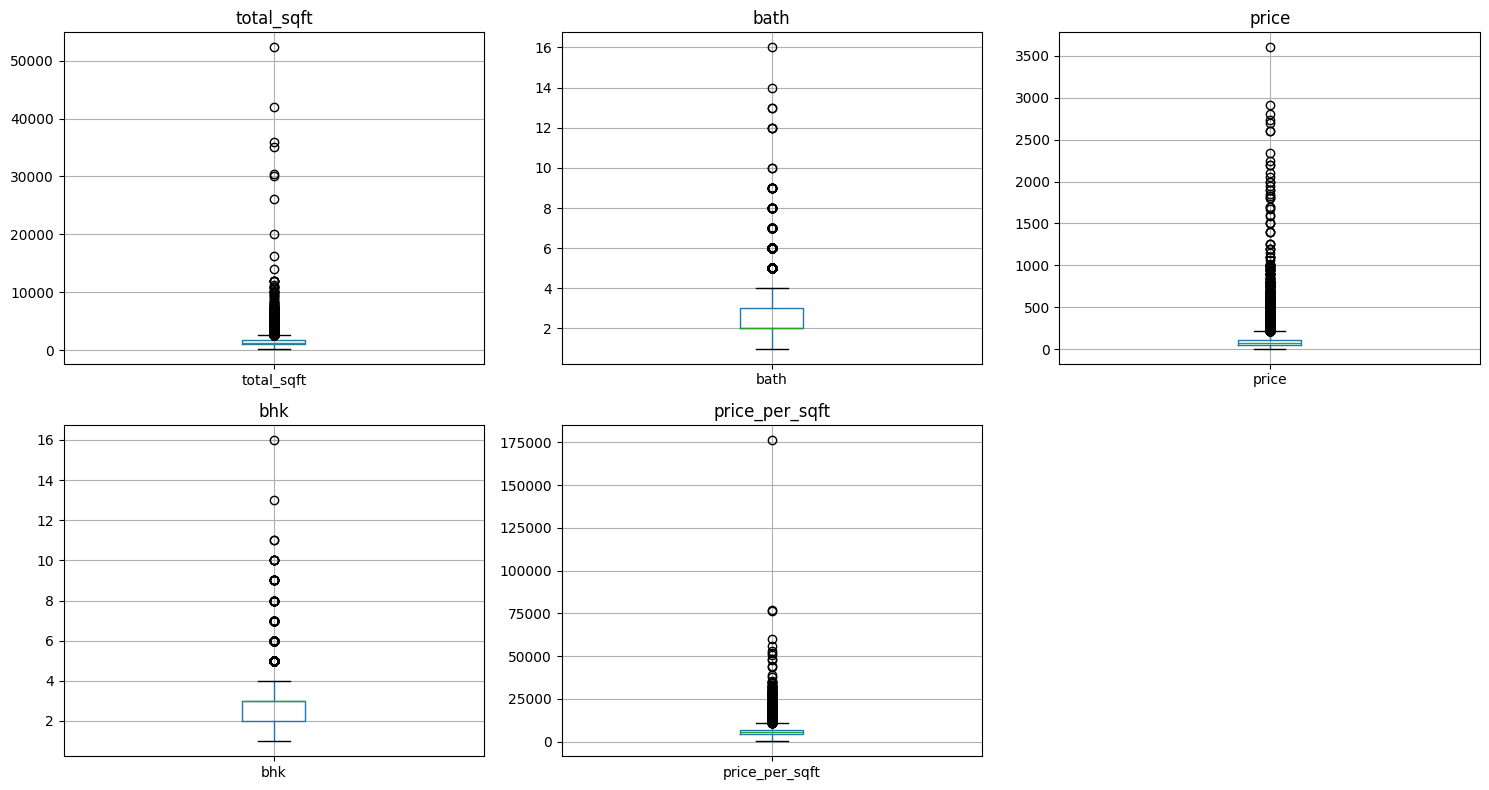

In [31]:

# List of columns to plot
cols = ["total_sqft", "bath", "price", "bhk", "price_per_sqft"]

# Create subplots
plt.figure(figsize=(15,8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 cols grid
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()


In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft < (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df)
df2.shape



(10301, 7)

In [33]:
df2.price_per_sqft.describe()

count    10301.000000
mean      5659.062876
std       2265.774749
min       1250.000000
25%       4244.897959
50%       5175.600739
75%       6428.571429
max      24509.803922
Name: price_per_sqft, dtype: float64

In [34]:
df2.shape

(10301, 7)

In [35]:
df2.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


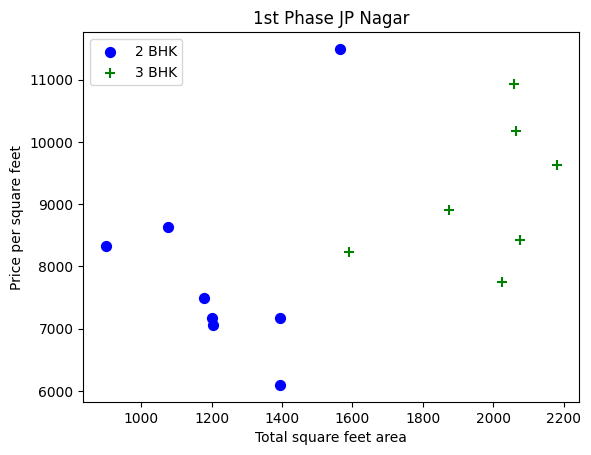

In [36]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color="blue", label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker="+", color="green", label='3 BHK', s=50)
    
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df2, "1st Phase JP Nagar")



In [37]:
df2.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = []
    
    for location, location_df in df.groupby('location'):
        # Calculate mean price_per_sqft for each bhk in this location
        bhk_stats = location_df.groupby('bhk')['price_per_sqft'].mean().to_dict()
        bhk_counts = location_df.groupby('bhk')['price_per_sqft'].count().to_dict()
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Check previous BHK
            if bhk - 1 in bhk_stats and bhk_counts[bhk - 1] > 5:
                mean_prev_bhk = bhk_stats[bhk - 1]
                # Exclude units with lower price_per_sqft than mean of previous BHK
                indices_to_exclude = bhk_df[bhk_df.price_per_sqft < mean_prev_bhk].index
                exclude_indices.extend(indices_to_exclude)
    
    return df.drop(exclude_indices, axis='index')


df3 = remove_bhk_outliers(df2)
df3.shape


(7361, 7)

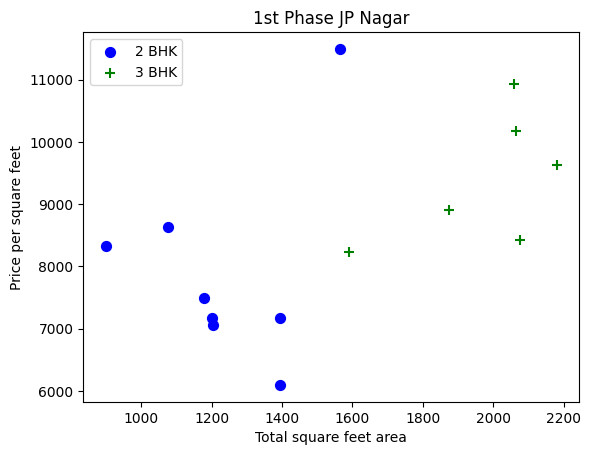

In [39]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color="blue", label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker="+", color="green", label='3 BHK', s=50)
    
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df3, "1st Phase JP Nagar")



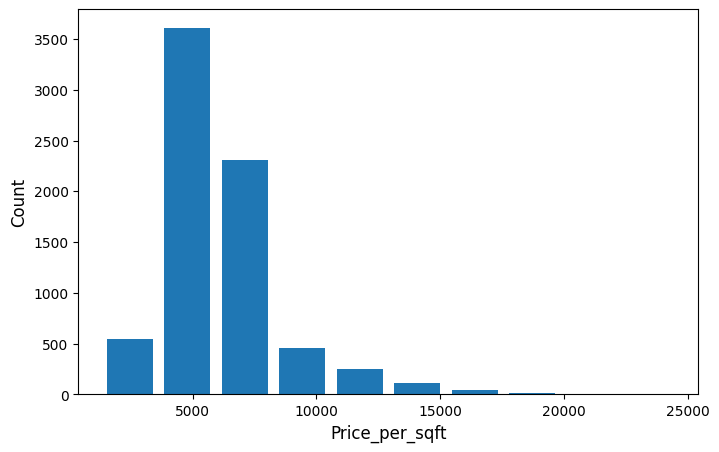

In [40]:
plt.figure(figsize=(8,5))
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price_per_sqft", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [41]:
df3.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df3[df3.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8543,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8632,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9365,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9697,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

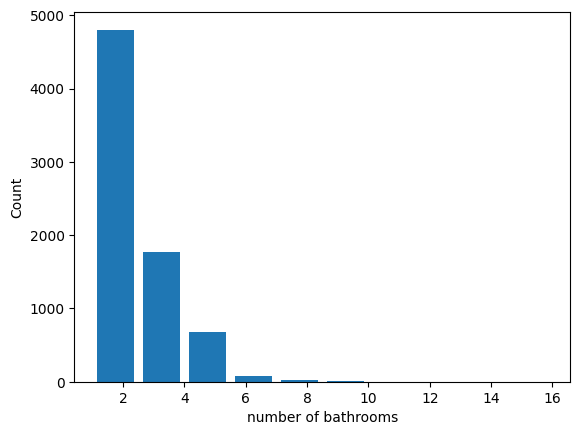

In [43]:
plt.hist(df3.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel('Count')

In [44]:
df3[df3.bath>df3.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8468,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [45]:
df4 = df3[df3.bath<df3.bhk+2]
df4.shape

(7282, 7)

In [46]:
df5 = df4.drop(['size','price_per_sqft'],axis='columns')
df5.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [47]:
dummies = pd.get_dummies(df5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
df6 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df7 = df6.drop('location',axis='columns')
df7.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df7.shape

(7282, 245)

In [51]:
X = df7.drop('price',axis='columns')
Y = df7.price

In [52]:
from sklearn.preprocessing import StandardScaler
num_cols = ["total_sqft", "bath", "bhk"]
st = StandardScaler()
X[num_cols] = st.fit_transform(X[num_cols])


In [53]:
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1.675518,1.702014,1.661754,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.189822,0.632176,0.565261,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.488179,-0.437661,0.565261,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.333825,-0.437661,0.565261,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.291202,-0.437661,-0.531231,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=32)

In [89]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [90]:
# from sklearn.linear_model import Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import r2_score

# models = {
#     "LinearRegression": LinearRegression(),
#     "Ridge": Ridge(alpha=1),
#     "Lasso": Lasso(alpha=0.1),
#     "DecisionTree": DecisionTreeRegressor(random_state=42),
#     "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
#     "GradientBoosting": GradientBoostingRegressor(random_state=42)
# }

# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     print(f"{name} R2 Score: {r2_score(Y_test, y_pred)*100:.2f}")


In [91]:
lr_clf.score(X_test,Y_test)*100

87.73963928768839

In [92]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [93]:
def predict_price(location, sqft, bath, bhk):
    # Use global X columns for reference
    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    # Set the location column to 1 if it exists
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]




In [94]:
# Example usage
predict_price('1st Phase JP Nagar', 1000, 3, 3)

c:\Users\vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(71711.45129802251)

In [95]:
# Example usage
predict_price('Abbigere', 1200, 4, 4)

c:\Users\vikas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(85965.35858282428)

In [96]:
import pickle
with open ('banglor_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [97]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    json.dump(columns, f)
